<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1.-Импорт-библиотек">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>
                    Импорт библиотек
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#2.-Подготовка-данных">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>
                    Подготовка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#3.-Оптимизация-тестовых-функций">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>
                    Оптимизация тестовых функций
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#3.1.-Функция-Изома">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>
                            Функция Изома
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#3.2.-Функция-Растригина">
                            <span class="toc-item-num">3.2.&nbsp;&nbsp;</span>
                            Функция Растригина
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#4.-Оптимизация-алгоритмической-проблемы">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>
                    Оптимизация алгоритмической проблемы
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#5.-Общий-вывод">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Лабораторная работа №2: Pygmo

**Задача 1:** найти оптимумы тестовых функций для оптимизации с помощью двух алгоритмов библиотеки `pygmo`.

**Задача 2:** сконструировать нефункциональную (алгоритмическую) проблему оптимизации и решить с помощью `pygmo`. 

**Источник данных:** сгенерированный набор точек.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 1. Импорт библиотек

Установка необходимых библиотек:

In [1]:
# !pip install pygmo

In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.comNote: you may need to restart the kernel to use updated packages.



Импорт всех необходимых библиотек:

In [3]:
import pygmo as pg
import numpy as np
import cv2

from typing import Mapping, Tuple

import matplotlib.pyplot as plt

from utils.plot_charts import plot_contour_search_2d, \
                              plot_cv_image_landscape_3d

Внутрипроектный модуль `plot_charts` включает в себя следующие функциии, необходимые для выполнения задач:

* `plot_contour_search_2d` - построение двумерного графика заданной функции с поиском минимума

* `plot_cv_image_landscape_3d` - построение трёхмерного ландшафта по изображению

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 2. Подготовка данных

Задание множества точек:

In [4]:
x_linear = np.linspace(-5, 5, 1000)
y_linear = np.linspace(-5, 5, 1000)

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 3. Оптимизация тестовых функций

В качестве алгоритмов оптимизации градиентного спуска будут использованы следующие методы библиотеки `pygmo`:

* *Self-adaptive Differential Evolution (SADE)*
* *Grey Wolf Optimizer (GWO)*

Задание класса проблемы:

In [5]:
class Problem:
    def __init__(self, loss_f):
        self.loss_f = loss_f

    def fitness(self, x):
        try:
            return [self.loss_f(x[0], x[1])]
        except:
            return [self.loss_f(x)]

    def get_bounds(self):
        return ([-5, -5], [5, 5])

Задание функции, вычисляющей минимум функции по переданному алгоритму:

In [6]:
def get_algo_pop(prob, algo_f: Mapping, title: str = '', pops: int = 100, display: bool = True, **params):
    """Get algo and pop
    
       Args:
           prob (Generic): problem
           algo_f (Mapping): algorithm
           pops (int, optional): number of pops. Defaults to 100
           display (bool, optional): print or not. Defaults to True
           *kwargs: gen=..., limit=..., etc.
        
       Return:
           Tuple: algo, pop
    """
    
    pop = pg.population(prob, pops)
    algo = pg.algorithm(algo_f(**params))
    pop = pg.population(prob, pops)
    pop = algo.evolve(pop)
    
    if display == True:
        print(f'Terminated minimum with {title} algorithm:', pop.champion_x)
    
    return algo, pop

<div style="height: 2px; background-color: blue; opacity: 0.2; margin: 10px 0;"></div>

### 3.1. Функция Изома

Задание функции:

In [7]:
def izom_loss(x, y):
    return -np.cos(x) * np.cos(x) * np.exp(-((x - np.pi) ** 2 + (y - np.pi) ** 2))

 Сохранение проблемы:

In [8]:
prob = Problem(izom_loss)

**Self-adaptive Differential Evolution**

Сохранение результатов поиска минимума:

In [9]:
algo, pop = get_algo_pop(prob, pg.sade, 'SADE', gen=10)

Terminated minimum with SADE algorithm: [3.18749427 3.08648781]


Выведение на экран результатов поиска минимума:

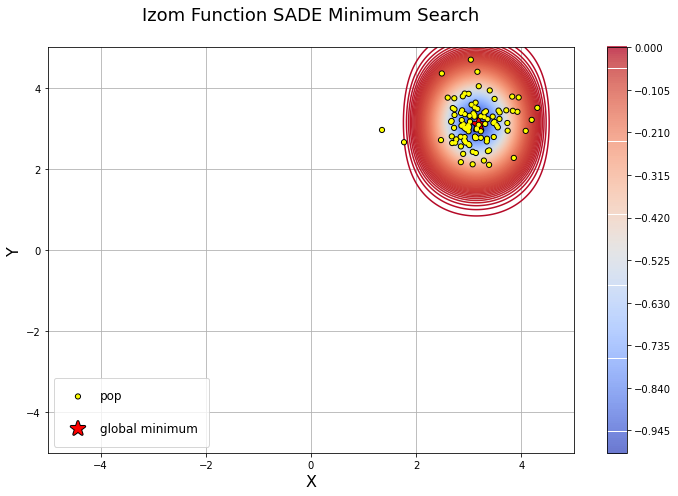

In [10]:
plot_contour_search_2d(x_linear, y_linear, izom_loss, pop,
                       'Izom Function SADE Minimum Search')

**Grey Wolf Optimizer (gwo)**

Сохранение результатов поиска минимума:

In [11]:
algo, pop = get_algo_pop(prob, pg.gwo, 'GWO', gen=10)

Terminated minimum with GWO algorithm: [3.13651534 3.13798476]


Выведение на экран результатов поиска минимума:

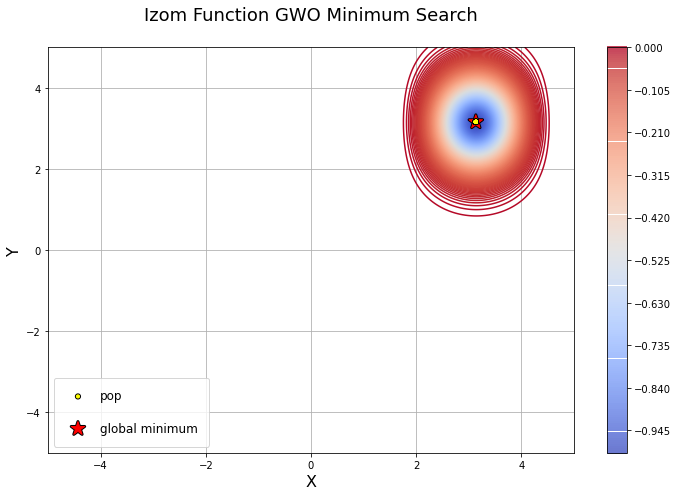

In [12]:
plot_contour_search_2d(x_linear, y_linear, izom_loss, pop,
                       'Izom Function GWO Minimum Search')

>**Вывод**
>
>Оба метода достигли глобального минимума.

<div style="height: 2px; background-color: blue; opacity: 0.2; margin: 10px 0;"></div>

### 3.2. Функция Растригина

Задание функции:

In [13]:
def rastrigin_loss(*X, A=10):
    return A + sum([(x ** 2 - A * np.cos(2 * np.pi * x)) for x in X])

Сохранение проблемы:

In [14]:
prob = Problem(rastrigin_loss)

**Self-adaptive Differential Evolution**

Сохранение результатов поиска минимума:

In [15]:
algo, pop = get_algo_pop(prob, pg.sade, 'SADE', gen=10)

Terminated minimum with SADE algorithm: [-0.03551995 -0.01651227]


Выведение на экран результатов поиска минимума:

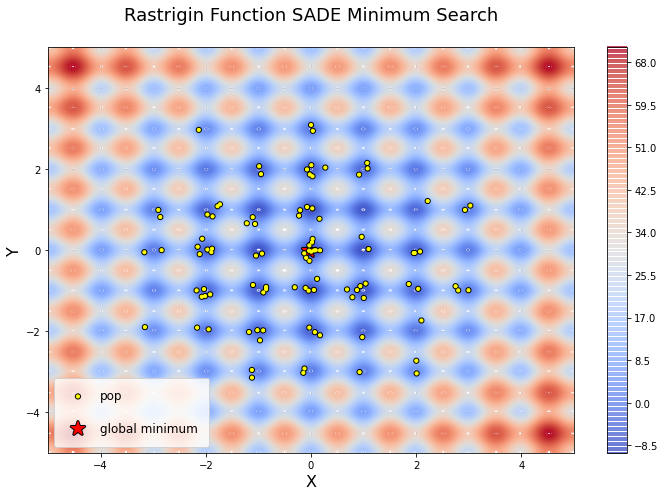

In [16]:
plot_contour_search_2d(x_linear, y_linear, rastrigin_loss, pop,
                       'Rastrigin Function SADE Minimum Search')

**Grey Wolf Optimizer (gwo)**

Сохранение результатов оптимизации глобального минимума:

In [17]:
algo, pop = get_algo_pop(prob, pg.gwo, 'GWO', gen=10)

Terminated minimum with GWO algorithm: [-6.00177660e-08 -6.66895517e-08]


Выведение на экран результатов оптимизации глобального минимума:

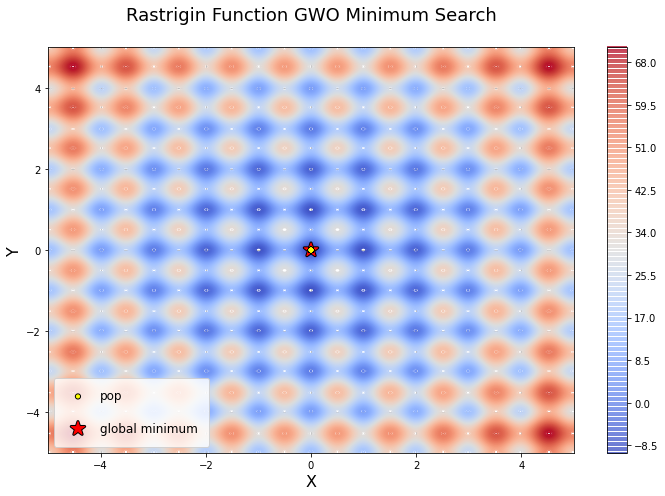

In [18]:
plot_contour_search_2d(x_linear, y_linear, rastrigin_loss, pop,
                       'Rastrigin Function GWO Minimum Search')

>**Вывод**
>
>Оба метода достигли глобального минимума.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 4. Оптимизация алгоритмической проблемы

В качестве нефункциональной (алгоритмической) проблемы оптимизации будет рассмотрено преобразование входящего изображения в ландшафт, по которому будет произведён поиск глобального минимума с помощью алгоритма *(N+1)-ES simple evolutionary algorithm (SEA)* библиотеки `pygmo`.

Задание функции выведения на экран изображения:

In [19]:
def plot_image(image):
    plt.figure(figsize=(image.shape[1]/80, image.shape[0]/80))
    plt.imshow(image)
    plt.show()

<div style="height: 2px; background-color: blue; opacity: 0.2; margin: 10px 0;"></div>

Сохранение изображения в переменную:

In [20]:
img = cv2.imread('./datasets/pygmo_depth_problem.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Выведение на экран размера изображения:

In [21]:
print('Image shape:', img.shape)

Image shape: (512, 512, 3)


Выведение изображения на экран:

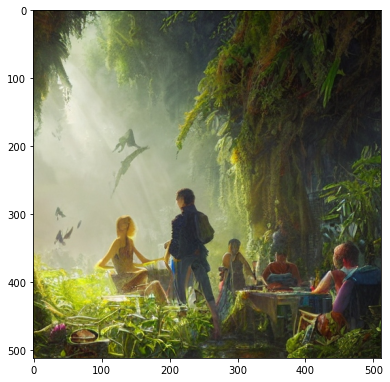

In [22]:
plot_image(img)

Конвертирование изображение в чёрно-белый цвет:

In [23]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Выведение на экран размера изображения:

In [24]:
print('Image shape:', img.shape)

Image shape: (512, 512)


Выведение изображения на экран:

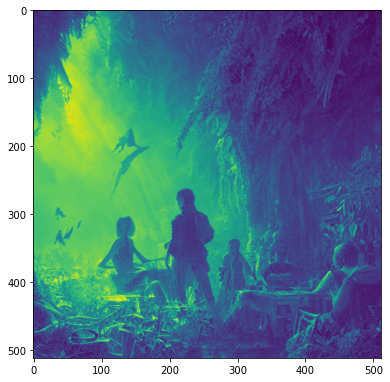

In [25]:
plot_image(img)

Задание множества точек:

In [26]:
x_image = np.arange(img.shape[0])
y_image = np.arange(img.shape[1])

Выведение на экран ландшафта изображения:

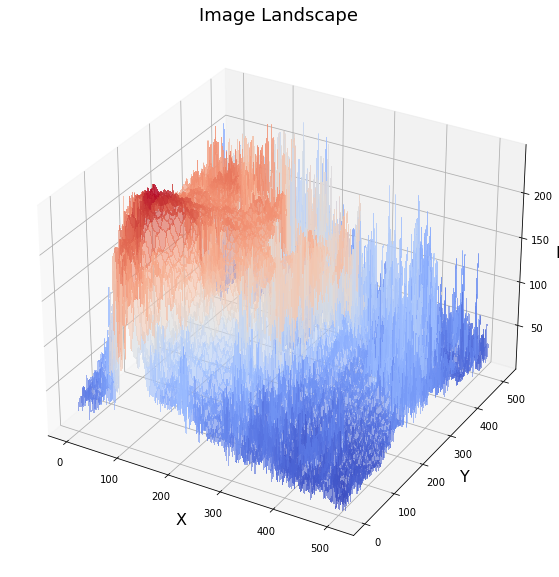

In [27]:
plot_cv_image_landscape_3d(x_image, y_image, img, 
                           'Image Landscape')

Задание класса нового ландшафта:

In [28]:
class Image:
    def __init__(self, img):
        self.img = img
        
    def fitness(self, x):
        return [self.img[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0, 0], [self.img.shape[0]-1, self.img.shape[1]-1])

Сохранение проблемы:

In [29]:
prob = Image(img)

Задание констант:

In [30]:
GENS = 1000

Сохранение результатов оптимизации глобального минимума:

In [31]:
image_algos, image_pops, image_champions = [], [], []

for gen in range(1, GENS + 1):
    algo, pop = get_algo_pop(prob, pg.sea, 'SEA', display=False, gen=gen)

    image_algos.append(algo)
    image_pops.append(pop)
    image_champions.append(pop.champion_x)

Сохранение найденных точек глобального минимума:

In [32]:
image_best_pops = np.array([pop.get_x()[pop.best_idx()] for pop in image_pops])

Выведение на экран результатов оптимизации глобального минимума:

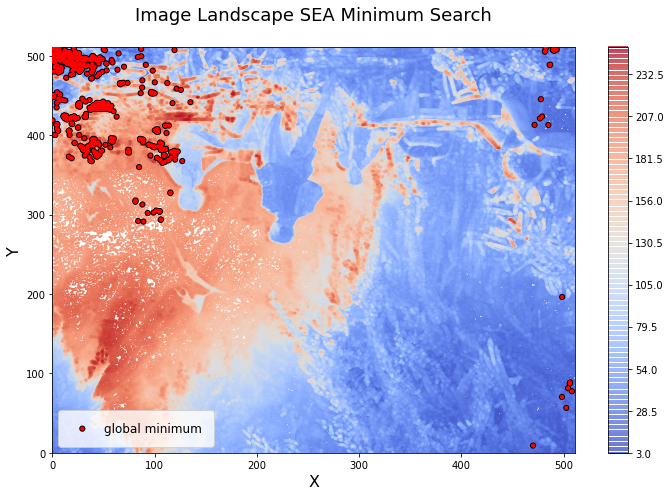

In [33]:
plot_contour_search_2d(x_image, y_image, None, image_best_pops,
                       'Image Landscape SEA Minimum Search',
                       z=img)

>**Вывод**
>
>Алгоритм продемонстрировал двоякий результат: намбольшее скопление минимумов стремится к координате $ (0, 500) $, однако также заметно наличие минимумов при координатах больше $ (450, 400) $.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 5. Общий вывод

С помощью `pygmo` выполнена реализация:

* Поиска глобального минимума через алгоритмы *Self-adaptive Differential Evolution (SADE)* и *Grey Wolf Optimizer (GWO)*.

Реализация включает в себя демонстрацию работы алгоритмов как на сгенерированных точках, так и на изображении в рамках выполнения нефункциональной алгоритмической проблемы.

Алгоритмическая проблема была рассмотрена с помощью алгоритма *(N+1)-ES simple evolutionary algorithm (SEA)*. 

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        Наверх к содержанию ↑
    </a>
</div>